<a href="https://colab.research.google.com/github/MohamedA2000/Machine-Learning-Projects/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create 30, 000 samples which include x and associated y values


In [ ]:
import numpy as np

np.random.seed(42)

x = np.random.uniform(low=-1, high=1, size=(30000, 1))

y = 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10

data = np.concatenate([x, y], axis=1)

data


array([[-0.25091976,  9.9754927 ],
       [ 0.90142861, 11.67826659],
       [ 0.46398788, 10.23057702],
       ...,
       [-0.96108827,  8.48751341],
       [-0.19799032,  9.98870484],
       [-0.48520404,  9.80617074]])

Question One

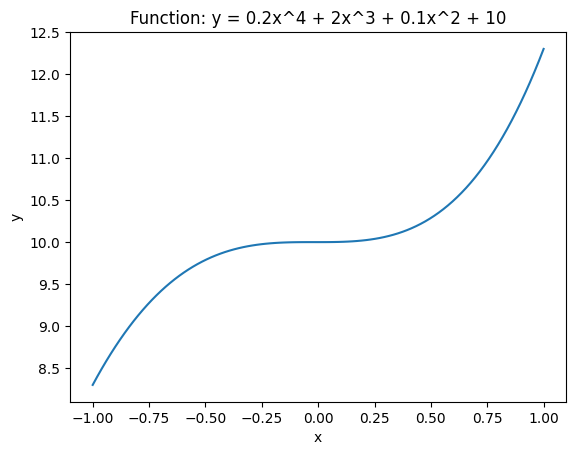

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def equally_place(n):
    x = np.linspace(-1, 1, n).reshape(n, 1)
    
    y = 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10
    
    return x, y

    #  data
x, y = equally_place(100)

# plot function
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function: y = 0.2x^4 + 2x^3 + 0.1x^2 + 10')
plt.show()



Question 2

In [ ]:
import numpy as np

def get_dataset(n, shuffle=False):
    # generate x values between -1 and 1
    x = np.linspace(-1, 1, n).reshape(n, 1)
    y = 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10
    # combine x and y into a single array
    data = np.concatenate([x, y], axis=1)
    
    if shuffle:
        np.random.shuffle(data)
    
    return data
# generate unshuffled data
data_unshuffled = get_dataset(100, shuffle= False)

# generate shuffled data
data_shuffled = get_dataset(100, shuffle=True)


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

data_unshuffled = get_dataset(100)
# print(data_unshuffled)
# plt.scatter(data_unshuffled[:, 0], data_unshuffled[:, 1])
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Unshuffled Data')
# plt.show()

# print(data_unshuffled)




data_shuffled = get_dataset(100, shuffle=True)
# plt.scatter(data_shuffled[:, 0], data_shuffled[:, 1])
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Shuffled Data')
# plt.show()

# print(data_shuffled)



Question 3

In [ ]:
def split_dataset(data, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2):
    num_samples = data.shape[0]
    num_train = int(train_ratio * num_samples)
    num_val = int(val_ratio * num_samples)
    num_test = num_samples - num_train - num_val
    
    train_data = data[:num_train, :]
    val_data = data[num_train:num_train+num_val, :]
    test_data = data[num_train+num_val:, :]
    
    return train_data, val_data, test_data


Print # of samples, and and the dimension (2 for x,y)

In [ ]:
# generate shuffled data
data = get_dataset(100, shuffle=True)

# split data into sets
train_data, val_data, test_data = split_dataset(data, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15)

print("Train data shape:", train_data.shape)
print("Validation data shape:", val_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (70, 2)
Validation data shape: (15, 2)
Test data shape: (15, 2)


Question 4

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def scale_data(data):
    scaler = MinMaxScaler()
    
    scaler.fit(data)
    
    scaled_data = scaler.transform(data)
    
    return scaled_data


data = get_dataset(100)

scaled_data = scale_data(data)

print("Original Data:")
print(data[:5])
print("Scaled Data:")
print(scaled_data[:5])


Original Data:
[[-1.          8.3       ]
 [-0.97979798  8.39910186]
 [-0.95959596  8.4944272 ]
 [-0.93939394  8.58603659]
 [-0.91919192  8.67399139]]
Scaled Data:
[[0.         0.        ]
 [0.01010101 0.02477546]
 [0.02020202 0.0486068 ]
 [0.03030303 0.07150915]
 [0.04040404 0.09349785]]


Question 5

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_predictions(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    
    mse = mean_squared_error(y_true, y_pred)
    
    rmse = np.sqrt(mse)
    
    r2 = r2_score(y_true, y_pred)
    
    return mae, mse, rmse, r2


In [ ]:
import tensorflow as tf

def train_model(train_data, val_data, num_epochs=100, batch_size=32):
    # create model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mse')
    
    # train model
    model.fit(train_data[:, :-1], train_data[:, -1], epochs=num_epochs, batch_size=batch_size, validation_data=(val_data[:, :-1], val_data[:, -1]), verbose=0)
    
    return model


In [ ]:
data = get_dataset(100)

# split data into sets
train_data, val_data, test_data = split_dataset(data, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2)

scaled_train_data = scale_data(train_data)
scaled_val_data = scale_data(val_data)
scaled_test_data = scale_data(test_data)

model = train_model(scaled_train_data, scaled_val_data)

x_test = scaled_test_data[:, :-1]
y_test_true = scaled_test_data[:, -1]
y_test_pred = model.predict(x_test).flatten()

mae, mse, rmse, r2 = evaluate_predictions(y_test_true, y_test_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


1/1 [==============================] - 0s 70ms/step
MAE: 0.3374527563325737
MSE: 0.12192117968586036
RMSE: 0.3491721347499831
R2 Score: -0.3204245242705368


PART 2

CASE 1 (SCALED,SHUFFLED)

469/469 [==============================] - 1s 2ms/step


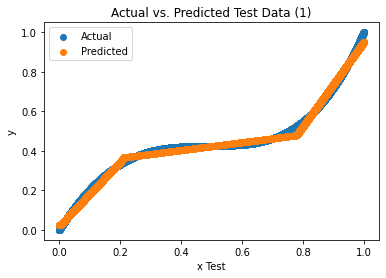

MAE: 0.0137772365
MSE: 0.0002683886
RMSE: 0.0163825687
R2 Score: 0.9924341256


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf

np.random.seed(44)
tf.random.set_seed(44)

def get_dataset(num_samples, shuffle=True):
    x = np.linspace(-1, 1, num_samples).reshape(num_samples, 1)
    y = 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10
    data = np.hstack((x, y))
    if shuffle:
        np.random.shuffle(data)
    return data

def split_dataset(data, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5):
    x = data[:, :-1]
    y = data[:, -1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio, shuffle=True)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_ratio/(train_ratio+val_ratio), shuffle=True)
    train_data = np.hstack((x_train, y_train.reshape(-1, 1)))
    val_data = np.hstack((x_val, y_val.reshape(-1, 1)))
    test_data = np.hstack((x_test, y_test.reshape(-1, 1)))
    return train_data, val_data, test_data

def scale_data(data):
    scaler = MinMaxScaler()
    scaler.fit(data)
    scaled_data = scaler.transform(data)
    return scaled_data

def train_model(scaled_train_data, scaled_val_data, num_epochs=20, batch_size=12):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(12, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(scaled_train_data[:, :-1], scaled_train_data[:, -1], epochs=num_epochs, batch_size=batch_size, validation_data=(scaled_val_data[:, :-1], scaled_val_data[:, -1]), verbose=0)
    return model

def evaluate_predictions(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

data = get_dataset(30000, shuffle=True)

train_data, val_data, test_data = split_dataset(data, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

scaled_train_data = scale_data(train_data)
scaled_val_data = scale_data(val_data)
scaled_test_data = scale_data(test_data)

model_relu = train_model(scaled_train_data, scaled_val_data, num_epochs=20, batch_size=12)

y_true = scaled_test_data[:, -1]
y_pred = model_relu.predict(scaled_test_data[:, :-1]).reshape(-1)
mae, mse, rmse, r2 = evaluate_predictions(y_true, y_pred)

plt.scatter(scaled_test_data[:, 0], y_true, label='Actual')
plt.scatter(scaled_test_data[:, 0], y_pred, label='Predicted')
plt.xlabel('x Test')
plt.ylabel('y')
plt.title('Actual vs. Predicted Test Data (1)')
plt.legend()
plt.show()



print('MAE: {:.10f}'.format(mae))
print('MSE: {:.10f}'.format(mse))
print('RMSE: {:.10f}'.format(rmse))
print('R2 Score: {:.10f}'.format(r2))



CASE 1(NONSCALED,SHUFFLED)

469/469 [==============================] - 1s 1ms/step


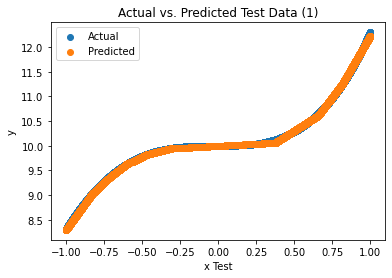

MAE: 0.0186518426
MSE: 0.0004976142
RMSE: 0.0223072672
R2 Score: 0.9991230613


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf

np.random.seed(44)
tf.random.set_seed(44)

def get_dataset(num_samples, shuffle=True):
    x = np.linspace(-1, 1, num_samples).reshape(num_samples, 1)
    y = 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10
    data = np.hstack((x, y))
    if shuffle:
        np.random.shuffle(data)
    return data

def split_dataset(data, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5):
    x = data[:, :-1]
    y = data[:, -1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio, shuffle=True)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_ratio/(train_ratio+val_ratio), shuffle=True)
    train_data = np.hstack((x_train, y_train.reshape(-1, 1)))
    val_data = np.hstack((x_val, y_val.reshape(-1, 1)))
    test_data = np.hstack((x_test, y_test.reshape(-1, 1)))
    return train_data, val_data, test_data

def train_model(train_data, val_data, num_epochs=20, batch_size=12):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(12, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(train_data[:, :-1], train_data[:, -1], epochs=num_epochs, batch_size=batch_size, validation_data=(val_data[:, :-1], val_data[:, -1]), verbose=0)
    return model

def evaluate_predictions(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

data = get_dataset(30000, shuffle=True)

train_data, val_data, test_data = split_dataset(data, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

model_relu = train_model(train_data, val_data, num_epochs=20, batch_size=12)

y_true = test_data[:, -1]
y_pred = model_relu.predict(test_data[:, :-1]).reshape(-1)
mae, mse, rmse, r2 = evaluate_predictions(y_true, y_pred)

plt.scatter(test_data[:, 0], y_true, label='Actual')
plt.scatter(test_data[:, 0], y_pred, label='Predicted')
plt.xlabel('x Test')
plt.ylabel('y')
plt.title('Actual vs. Predicted Test Data (1)')
plt.legend()
plt.show()

print('MAE: {:.10f}'.format(mae))
print('MSE: {:.10f}'.format(mse))
print('RMSE: {:.10f}'.format(rmse))
print('R2 Score: {:.10f}'.format(r2))


CASE 1 UNSHUFFLED

469/469 [==============================] - 1s 2ms/step


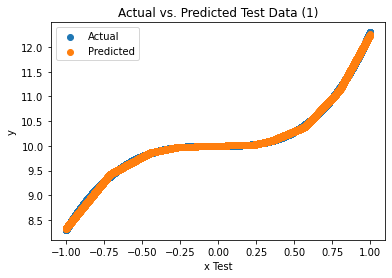

MAE: 0.0140296302
MSE: 0.0003671667
RMSE: 0.0191615933
R2 Score: 0.9993529472


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf

np.random.seed(44)
tf.random.set_seed(44)

def get_dataset(num_samples, shuffle=False):
    x = np.linspace(-1, 1, num_samples).reshape(num_samples, 1)
    y = 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10
    data = np.hstack((x, y))
    if shuffle:
        np.random.shuffle(data)
    return data

def split_dataset(data, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5):
    x = data[:, :-1]
    y = data[:, -1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio, shuffle=True)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_ratio/(train_ratio+val_ratio), shuffle=True)
    train_data = np.hstack((x_train, y_train.reshape(-1, 1)))
    val_data = np.hstack((x_val, y_val.reshape(-1, 1)))
    test_data = np.hstack((x_test, y_test.reshape(-1, 1)))
    return train_data, val_data, test_data

def train_model(train_data, val_data, num_epochs=20, batch_size=12):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(12, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(train_data[:, :-1], train_data[:, -1], epochs=num_epochs, batch_size=batch_size, validation_data=(val_data[:, :-1], val_data[:, -1]), verbose=0)
    return model

def evaluate_predictions(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

data = get_dataset(30000, shuffle=True)

train_data, val_data, test_data = split_dataset(data, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

model_relu = train_model(train_data, val_data, num_epochs=20, batch_size=12)

y_true = test_data[:, -1]
y_pred = model_relu.predict(test_data[:, :-1]).reshape(-1)
mae, mse, rmse, r2 = evaluate_predictions(y_true, y_pred)

plt.scatter(test_data[:, 0], y_true, label='Actual')
plt.scatter(test_data[:, 0], y_pred, label='Predicted')
plt.xlabel('x Test')
plt.ylabel('y')
plt.title('Actual vs. Predicted Test Data (1)')
plt.legend()
plt.show()

print('MAE: {:.10f}'.format(mae))
print('MSE: {:.10f}'.format(mse))
print('RMSE: {:.10f}'.format(rmse))
print('R2 Score: {:.10f}'.format(r2))


CASE 2

469/469 [==============================] - 1s 2ms/step
MAE: 0.0145177418
MSE: 0.0004198823
RMSE: 0.0204910297
R2 Score: 0.9992600471


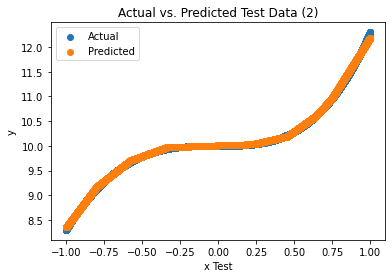

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf

np.random.seed(44)
tf.random.set_seed(44)

def get_dataset(num_samples, shuffle=True):
    x = np.linspace(-1, 1, num_samples).reshape(num_samples, 1)
    y = 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10
    data = np.hstack((x, y))
    if shuffle:
        np.random.shuffle(data)
    return data

def split_dataset(data, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5):
    x = data[:, :-1]
    y = data[:, -1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio, shuffle=True)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_ratio/(train_ratio+val_ratio), shuffle=True)
    train_data = np.hstack((x_train, y_train.reshape(-1, 1)))
    val_data = np.hstack((x_val, y_val.reshape(-1, 1)))
    test_data = np.hstack((x_test, y_test.reshape(-1, 1)))
    return train_data, val_data, test_data

def train_model(train_data, val_data, num_epochs=20, batch_size=12):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(24, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(train_data[:, :-1], train_data[:, -1], epochs=num_epochs, batch_size=batch_size, validation_data=(val_data[:, :-1], val_data[:, -1]), verbose=0)
    return model

def evaluate_predictions(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

data = get_dataset(30000, shuffle=True)

train_data, val_data, test_data = split_dataset(data, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

model_relu = train_model(train_data, val_data, num_epochs=20, batch_size=12)

y_true = test_data[:, -1]
y_pred = model_relu.predict(test_data[:, :-1]).reshape(-1)
mae, mse, rmse, r2 = evaluate_predictions(y_true, y_pred)

# plot actual vs. predicted test data
plt.scatter(test_data[:, 0], y_true, label='Actual')
plt.scatter(test_data[:, 0], y_pred, label='Predicted')
plt.xlabel('x Test')
plt.ylabel('y')
plt.title('Actual vs. Predicted Test Data (2)')
plt.legend()

print('MAE: {:.10f}'.format(mae))
print('MSE: {:.10f}'.format(mse))
print('RMSE: {:.10f}'.format(rmse))
print('R2 Score: {:.10f}'.format(r2))


CASE 2 UNSHUFFLED

469/469 [==============================] - 1s 2ms/step
MAE: 0.0548667841
MSE: 0.0041220538
RMSE: 0.0642032223
R2 Score: 0.9927357608


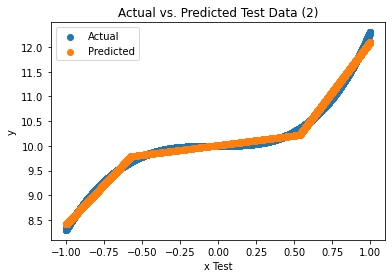

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf

np.random.seed(44)
tf.random.set_seed(44)

def get_dataset(num_samples, shuffle=False):
    x = np.linspace(-1, 1, num_samples).reshape(num_samples, 1)
    y = 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10
    data = np.hstack((x, y))
    if shuffle:
        np.random.shuffle(data)
    return data

def split_dataset(data, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5):
    x = data[:, :-1]
    y = data[:, -1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio, shuffle=True)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_ratio/(train_ratio+val_ratio), shuffle=True)
    train_data = np.hstack((x_train, y_train.reshape(-1, 1)))
    val_data = np.hstack((x_val, y_val.reshape(-1, 1)))
    test_data = np.hstack((x_test, y_test.reshape(-1, 1)))
    return train_data, val_data, test_data

def train_model(train_data, val_data, num_epochs=20, batch_size=12):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(24, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(train_data[:, :-1], train_data[:, -1], epochs=num_epochs, batch_size=batch_size, validation_data=(val_data[:, :-1], val_data[:, -1]), verbose=0)
    return model

def evaluate_predictions(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

data = get_dataset(30000, shuffle=True)

train_data, val_data, test_data = split_dataset(data, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

model_relu = train_model(train_data, val_data, num_epochs=20, batch_size=12)

y_true = test_data[:, -1]
y_pred = model_relu.predict(test_data[:, :-1]).reshape(-1)
mae, mse, rmse, r2 = evaluate_predictions(y_true, y_pred)

# plot actual vs. predicted test data
plt.scatter(test_data[:, 0], y_true, label='Actual')
plt.scatter(test_data[:, 0], y_pred, label='Predicted')
plt.xlabel('x Test')
plt.ylabel('y')
plt.title('Actual vs. Predicted Test Data (2)')
plt.legend()

# print evaluation metrics
print('MAE: {:.10f}'.format(mae))
print('MSE: {:.10f}'.format(mse))
print('RMSE: {:.10f}'.format(rmse))
print('R2 Score: {:.10f}'.format(r2))


CASE 3

469/469 [==============================] - 1s 1ms/step


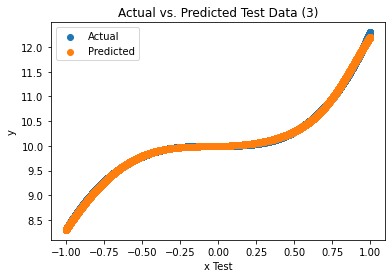

MAE: 0.0113066825
MSE: 0.0002245798
RMSE: 0.0149859857
R2 Score: 0.9996042261


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf

np.random.seed(44)
tf.random.set_seed(44)

def get_dataset(num_samples, shuffle=True):
    x = np.linspace(-1, 1, num_samples).reshape(num_samples, 1)
    y = 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10
    data = np.hstack((x, y))
    if shuffle:
        np.random.shuffle(data)
    return data

def split_dataset(data, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5):
    x = data[:, :-1]
    y = data[:, -1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio, shuffle=True)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_ratio/(train_ratio+val_ratio), shuffle=True)
    train_data = np.hstack((x_train, y_train.reshape(-1, 1)))
    val_data = np.hstack((x_val, y_val.reshape(-1, 1)))
    test_data = np.hstack((x_test, y_test.reshape(-1, 1)))
    return train_data, val_data, test_data

def train_model(train_data, val_data, num_epochs=20, batch_size=12, activation='relu'):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(12, activation=activation, input_shape=(1,)),
        tf.keras.layers.Dense(8, activation=activation),
        tf.keras.layers.Dense(4, activation=activation),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(train_data[:, :-1], train_data[:, -1], epochs=num_epochs, batch_size=batch_size, validation_data=(val_data[:, :-1], val_data[:, -1]), verbose=0)
    return model

def evaluate_predictions(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

data = get_dataset(30000, shuffle=True)
# just in case
train_data, val_data, test_data = split_dataset(data, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

model_tanh = train_model(train_data, val_data, num_epochs=20, batch_size=12, activation='tanh')

y_true = test_data[:, -1]
y_pred = model_tanh.predict(test_data[:, :-1]).reshape(-1)
mae, mse, rmse, r2 = evaluate_predictions(y_true, y_pred)

plt.scatter(test_data[:, 0], y_true, label='Actual')
plt.scatter(test_data[:, 0], y_pred, label='Predicted')
plt.xlabel('x Test')
plt.ylabel('y')
plt.title('Actual vs. Predicted Test Data (3)')
plt.legend()
plt.show()

print('MAE: {:.10f}'.format(mae))
print('MSE: {:.10f}'.format(mse))
print('RMSE: {:.10f}'.format(rmse))
print('R2 Score: {:.10f}'.format(r2))


CASE 3 UNSHUFFLED

469/469 [==============================] - 1s 1ms/step


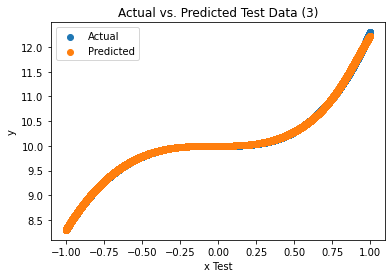

MAE: 0.0049718048
MSE: 0.0000704512
RMSE: 0.0083935185
R2 Score: 0.9998758449


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf

np.random.seed(44)
tf.random.set_seed(44)

def get_dataset(num_samples, shuffle=False):
    x = np.linspace(-1, 1, num_samples).reshape(num_samples, 1)
    y = 0.2 * x**4 + 2 * x**3 + 0.1 * x**2 + 10
    data = np.hstack((x, y))
    if shuffle:
        np.random.shuffle(data)
    return data

def split_dataset(data, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5):
    x = data[:, :-1]
    y = data[:, -1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio, shuffle=True)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_ratio/(train_ratio+val_ratio), shuffle=True)
    train_data = np.hstack((x_train, y_train.reshape(-1, 1)))
    val_data = np.hstack((x_val, y_val.reshape(-1, 1)))
    test_data = np.hstack((x_test, y_test.reshape(-1, 1)))
    return train_data, val_data, test_data

def train_model(train_data, val_data, num_epochs=20, batch_size=12, activation='relu'):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(12, activation=activation, input_shape=(1,)),
        tf.keras.layers.Dense(8, activation=activation),
        tf.keras.layers.Dense(4, activation=activation),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(train_data[:, :-1], train_data[:, -1], epochs=num_epochs, batch_size=batch_size, validation_data=(val_data[:, :-1], val_data[:, -1]), verbose=0)
    return model

def evaluate_predictions(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

data = get_dataset(30000, shuffle=True)
# just in case
train_data, val_data, test_data = split_dataset(data, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

model_tanh = train_model(train_data, val_data, num_epochs=20, batch_size=12, activation='tanh')

y_true = test_data[:, -1]
y_pred = model_tanh.predict(test_data[:, :-1]).reshape(-1)
mae, mse, rmse, r2 = evaluate_predictions(y_true, y_pred)

plt.scatter(test_data[:, 0], y_true, label='Actual')
plt.scatter(test_data[:, 0], y_pred, label='Predicted')
plt.xlabel('x Test')
plt.ylabel('y')
plt.title('Actual vs. Predicted Test Data (3)')
plt.legend()
plt.show()

print('MAE: {:.10f}'.format(mae))
print('MSE: {:.10f}'.format(mse))
print('RMSE: {:.10f}'.format(rmse))
print('R2 Score: {:.10f}'.format(r2))


CASE 4

469/469 [==============================] - 1s 1ms/step


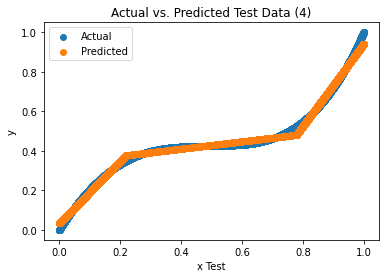

MAE: 0.0128254564
MSE: 0.0002500260
RMSE: 0.0158122115
R2 Score: 0.9931186501


In [ ]:
data = get_dataset(30000, shuffle=True)
scaled_data = scale_data(data)

train_data, val_data, test_data = split_dataset(scaled_data, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

model_scaled = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])
model_scaled.compile(optimizer='adam', loss='mse')
model_scaled.fit(train_data[:, :-1], train_data[:, -1], epochs=20, batch_size=12, validation_data=(val_data[:, :-1], val_data[:, -1]), verbose=0)

y_true = test_data[:, -1]
y_pred = model_scaled.predict(test_data[:, :-1]).reshape(-1)
mae, mse, rmse, r2 = evaluate_predictions(y_true, y_pred)

# plot actual vs. predicted test data
plt.scatter(test_data[:, 0], y_true, label='Actual')
plt.scatter(test_data[:, 0], y_pred, label='Predicted')
plt.xlabel('x Test')
plt.ylabel('y')
plt.title('Actual vs. Predicted Test Data (4)')
plt.legend()
plt.show()


print('MAE: {:.10f}'.format(mae))
print('MSE: {:.10f}'.format(mse))
print('RMSE: {:.10f}'.format(rmse))
print('R2 Score: {:.10f}'.format(r2))


CASE 4 UNShuffled

469/469 [==============================] - 1s 1ms/step


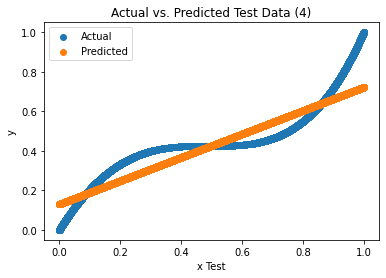

MAE: 0.0660338714
MSE: 0.0064356117
RMSE: 0.0802222641
R2 Score: 0.8215282888


In [ ]:
data = get_dataset(30000, shuffle=False)
scaled_data = scale_data(data)

train_data, val_data, test_data = split_dataset(scaled_data, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

model_scaled = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])
model_scaled.compile(optimizer='adam', loss='mse')
model_scaled.fit(train_data[:, :-1], train_data[:, -1], epochs=20, batch_size=12, validation_data=(val_data[:, :-1], val_data[:, -1]), verbose=0)

y_true = test_data[:, -1]
y_pred = model_scaled.predict(test_data[:, :-1]).reshape(-1)
mae, mse, rmse, r2 = evaluate_predictions(y_true, y_pred)

# plot actual vs. predicted test data
plt.scatter(test_data[:, 0], y_true, label='Actual')
plt.scatter(test_data[:, 0], y_pred, label='Predicted')
plt.xlabel('x Test')
plt.ylabel('y')
plt.title('Actual vs. Predicted Test Data (4)')
plt.legend()
plt.show()



print('MAE: {:.10f}'.format(mae))
print('MSE: {:.10f}'.format(mse))
print('RMSE: {:.10f}'.format(rmse))
print('R2 Score: {:.10f}'.format(r2))


CASE 5

469/469 [==============================] - 1s 1ms/step


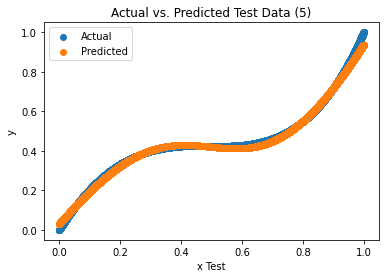

MAE: 0.0102670565
MSE: 0.0001874291
RMSE: 0.0136904740
R2 Score: 0.9947994778


In [ ]:
data = get_dataset(30000, shuffle=True)
scaled_data = scale_data(data)

train_data, val_data, test_data = split_dataset(scaled_data, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

model_tanh = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(8, activation='tanh'),
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(1)
])
model_tanh.compile(optimizer='adam', loss='mse')
model_tanh.fit(train_data[:, :-1], train_data[:, -1], epochs=20, batch_size=12, validation_data=(val_data[:, :-1], val_data[:, -1]), verbose=0)

y_true = test_data[:, -1]
y_pred = model_tanh.predict(test_data[:, :-1]).reshape(-1)
mae, mse, rmse, r2 = evaluate_predictions(y_true, y_pred)

# plot actual vs. predicted test data
plt.scatter(test_data[:, 0], y_true, label='Actual')
plt.scatter(test_data[:, 0], y_pred, label='Predicted')
plt.xlabel('x Test')
plt.ylabel('y')
plt.title('Actual vs. Predicted Test Data (5)')
plt.legend()
plt.show()



print('MAE: {:.10f}'.format(mae))
print('MSE: {:.10f}'.format(mse))
print('RMSE: {:.10f}'.format(rmse))
print('R2 Score: {:.10f}'.format(r2))


CASE 5 UNSHUFFLED

469/469 [==============================] - 1s 2ms/step


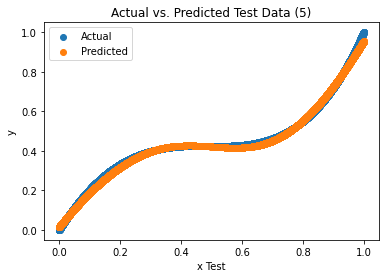

MAE: 0.0095161870
MSE: 0.0001439307
RMSE: 0.0119971123
R2 Score: 0.9960211200


In [ ]:
data = get_dataset(30000, shuffle=False)
scaled_data = scale_data(data)

train_data, val_data, test_data = split_dataset(scaled_data, train_ratio=0.3, val_ratio=0.2, test_ratio=0.5)

model_tanh = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(8, activation='tanh'),
    tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(1)
])
model_tanh.compile(optimizer='adam', loss='mse')
model_tanh.fit(train_data[:, :-1], train_data[:, -1], epochs=20, batch_size=12, validation_data=(val_data[:, :-1], val_data[:, -1]), verbose=0)

y_true = test_data[:, -1]
y_pred = model_tanh.predict(test_data[:, :-1]).reshape(-1)
mae, mse, rmse, r2 = evaluate_predictions(y_true, y_pred)

# plot actual vs. predicted test data
plt.scatter(test_data[:, 0], y_true, label='Actual')
plt.scatter(test_data[:, 0], y_pred, label='Predicted')
plt.xlabel('x Test')
plt.ylabel('y')
plt.title('Actual vs. Predicted Test Data (5)')
plt.legend()
plt.show()



print('MAE: {:.10f}'.format(mae))
print('MSE: {:.10f}'.format(mse))
print('RMSE: {:.10f}'.format(rmse))
print('R2 Score: {:.10f}'.format(r2))


QUESTION 6

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

np.random.seed(1)
weights_1 = np.random.uniform(low=-1, high=1, size=(2, 4))
weights_2 = np.random.uniform(low=-1, high=1, size=(4, 1))

print("Shapes:\nInput:", X.shape, "Hidden Layer 1:", weights_1.shape, "Hidden Layer 2:", weights_2.shape)

for epoch in range(50000):

    hidden_layer = sigmoid(np.dot(X, weights_1))
    output_layer = sigmoid(np.dot(hidden_layer, weights_2))

    output_error = y - output_layer

    output_delta = output_error * sigmoid_derivative(output_layer)
    hidden_error = output_delta.dot(weights_2.T) * sigmoid_derivative(hidden_layer)

    weights_2 += hidden_layer.T.dot(output_delta)
    weights_1 += X.T.dot(hidden_error)

predicted_output = sigmoid(np.dot(sigmoid(np.dot(X, weights_1)), weights_2))
print(f'>>>Predicted Output:\n{predicted_output}')


Shapes:
Input: (4, 2) Hidden Layer 1: (2, 4) Hidden Layer 2: (4, 1)
>>>Predicted Output:
[[0.00886457]
 [0.99345181]
 [0.99204399]
 [0.00662401]]
